# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [23]:
candidateno=277244 #this MUST be updated to your candidate number so that you get a unique data sample


In [24]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [25]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [26]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['one', 'can', 'not', 'observe', 'a', 'star', 'trek', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [27]:
#1a and 1b
#two freqdist objects
positive_freq=FreqDist()
negative_freq=FreqDist()
stop=stopwords.words('english')

#filtering and modify wordlist--removing stopwords,punctuation and convert to lower case
def normalise_data(wordlist):
  lower_case=[w.lower() for w in wordlist]
  modify=[w for w in lower_case if w.isalpha() and w not in stop]
  return modify

#creating training_normalise and testing_normalise from training_data and testing_data
training_normalise_data=[(FreqDist(normalise_data(wordlist)),label) for (wordlist,label) in training_data]
testing_normalise_data=[(FreqDist(normalise_data(wordlist)),label) for (wordlist,label) in testing_data]

#frequency distribution
for reviewDist,label in training_normalise_data:
  if label=='pos':
    positive_freq+=reviewDist
  else:
    negative_freq+=reviewDist
posdiff=positive_freq-negative_freq
negdiff=negative_freq-positive_freq

#returning topk words based on frequency diff
def most_frequent_words(posfreq,negfreq,topk):
    difference=posfreq-negfreq
    sorteddiff=difference.most_common()
    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords
#printing positive reviews
print("A list of 10 content words which are representative of the positive reviews in your training data:")
positive_review_list=most_frequent_words(positive_freq,negative_freq,10)
print(positive_review_list)

A list of 10 content words which are representative of the positive reviews in your training data:
['film', 'life', 'also', 'great', 'best', 'story', 'well', 'one', 'many', 'world']


In [28]:
#printing negaive reviews
print("A list of 10 content words which are representative of the negative reviews in your training data:")
negative_review_list=most_frequent_words(negative_freq,positive_freq,10)
print(negative_review_list)

A list of 10 content words which are representative of the negative reviews in your training data:
['bad', 'movie', 'plot', 'even', 'worst', 'script', 'least', 'nothing', 'stupid', 'boring']


**1C-Generate a list of 10 content words indicating postive and negative reviews**

Two wordlist has been created for positive and negative reviews based on the labels `pos` and `neg` in training data-

- I initialise '**`positive_freq`**'and '**`negative_freq`**'-two freqDist object. `Stopwords` module has been imported.`Stopwords` are set of commonly used words that carry very little information regarding the sentence and it can be removed.
- I use `normalise_data()` function where I take wordlist paramenter and we are converting word list to lower case  and it will also remove the stopwords  and non aplhabetic characters like punctuations which will store in modify list.
I used list comprehension to get `training_normalise_data` and `testing_normalise_data`. This are list of tuples. Both takes frequency distribution of normalised words(using `normalise_data()` function)  and also a label ('pos','neg') on training and testing data.we are basically recreating the **bag-of-words representations**, storing the results in `training_normalise_data` and `testing_normalise_data`

- In the next step, I accumulate frequency distributions separately. I used for loop on training_normalise_data to extract freqdist and label for each review. if 'pos', the freqdist add to positive_freq else it will add to negative_freq.
- In **`most_frequent_word()`** function , I take 3 argument-positive_freq,negative_freq and topk which are number of top words to extract.Then I find the difference between posfreq and negfreq and stored in `difference`.
Finally we sort the difference extracting the most common words and their frequencies as a list of tuples.
`Justwords` extracts the words from that sorted list having only the topk words. In summary, this task helps to identify highly discriminative words that contribute to the frequency of positive and negative feedback, allowing you to focus on the words that refer to one category.

- Finally we have the **`postive_review_list and negative_review_list`**  ready, where we call the most_frequent_word function and we are taking 10 top words (topk value)

We are trying to identify words which indicate positive sentiment and negative sentiment by comparing their frequency in positive and negative labelled data.

2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [29]:
#2a--wordlist classifier
from nltk.classify.api import ClassifierI
import random
class wordlistClassifier(ClassifierI):
  def __init__(self,pos,neg):
    self._pos=pos
    self._neg=neg

#classify method classify as 'pos' and 'neg based on word count value
  def classify(self,doc):
    count=0
    for w,v in doc.items():
      if w in self._pos:
        count+=v
      if w in self._neg:
        count-=v
    return "neg" if count<0 else "pos"

  def labels(self):
    return ("pos","neg")
#instance created
wclassifier=wordlistClassifier(positive_review_list,negative_review_list)
wclassifier.classify(FreqDist("The movie was boring".split())) #calling classsify method


'neg'

In [30]:
wclassifier.classify(FreqDist("The movie was great".split()))

'pos'

**2B--Wordlist Classifier**

- I imported **`ClassifierI from nltk.classify.api`** and also a random module. class `wordlistclassifier` is defined.
- `__init__` is used to initiate the classifier and takes two argument `pos` and neg stored as attribute of class instance
- In the **`classify()` methods** we initialise `count` to 0. The method takes freqDist of words as parameter.For loop used through each word in the document.if the word is in `positive word list,` frequency will be added to the count otherwise frequency will be subtracted from count.if count is less than 0 then it will  return `neg` otherwise `pos`. The `classify` methods basically, assign a count based on the frequency of words in the positive and negative list.
- The `label` method will return a tuple   -`pos` and `neg`.
- **instance `wclassifier`** has been created  for class `wordlistclassifier` where we will pass the `positive_review_list` and `negative_review_list`.We will call the `classify` method to label the document correctly based on the words from the **positive_review_list and negative_review_list**. we test it on two sentence -one is a representation of positive sentiment and another one is a negative sentiment. In each sentence during testing , we spilt the sentence into words to detect wheter it is a postive or negative sentiment(`split()` function). split() is a built in function used to split a string to its substring.


3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [31]:
#3a--accuracy calculation
#cls is the instance of classifier object which will return pos and neg.
def classifier_evaluate(cls,test_data):
  a=0
  docs,gs=zip(*test_data) #zip function and the *unpacking operator to transform list of tuple into two list
  pred=cls.classify_many(docs) #we will get a list of prediction for passing all the docs to the classifier
  for p,gl in zip(pred,gs):
    if p==gl:
      a+=1
  return a/(len(test_data))

In [32]:
docs,gs=zip(*testing_normalise_data)
pred=wclassifier.classify_many(docs)
accuracy_score=classifier_evaluate(wclassifier,testing_normalise_data)
print(f"The accuracy  of word list classifier is {accuracy_score}")

The accuracy  of word list classifier is 0.605


In [33]:
#3a --calculating recall, precision, f1 score (confusion matrix)
class confusion_matrix:
  def __init__(self,pred,gs,classes=("pos","neg")):
    self.p,self.n=classes
    self.TP=0 #truepositive
    self.FP=0 #falsepositive
    self.FN=0 #falsenegative
    self.TN=0 #truenegative
    for p,g in zip(pred,gs):
      if g==self.p:
        if p==self.p:
          self.TP+=1
        else:
          self.FN+=1
      elif p==self.p:
        self.FP+=1
      else:
        self.TN+=1
  def precision(self):
    p=0
    p=self.TP/(self.TP+self.FP)
    return p
  def recall(self):
    r=0
    r=self.TP/(self.TP+self.FN)
    return r
  def F1(self):
    f1=(2*self.precision()*self.recall())/(self.precision()+self.recall())
    return f1
#creating instance and calling the methods
cm=confusion_matrix(pred,gs)
p1=cm.precision()
r1=cm.recall()
f1=cm.F1()
print(f"precision of wordlist classifier:{p1}")
print(f"recall of wordlist classifier: {r1}")
print(f"f1 score of wordlist classifier: {f1}")

precision of wordlist classifier:0.5636363636363636
recall of wordlist classifier: 0.93
f1 score of wordlist classifier: 0.7018867924528301


**`Accuracy of classifier`**= $$\frac{number\; of\;correct\; prediction}{test\; data\; length} $$

**`precision`**: $$\frac{TP}{TP+FP} $$
 **`recall`**: $$\frac{TP}{TP+FN} $$

 **F1 score**: $$\frac{2×p×r}{p+r}$$

[p=***precision***

r=**`recall`**]

**3B--Imbalanced class**

**Accuracy is not a better measure if the data is imbalanced.**That means data should be balanced i.e there should equal number of positive and negative reviews.For example,there are 99 positive review and 1 negative review out of 100 reviews, the classifier predicts all the reviews as positive ,it would have achieve 99 percent accuracy.Here majority of the data is positive and minority is negative.It may achieve a high accuracy but as there is a inbalance in number of reviews the high accuracy is not the correct accuracy and it will unable to detect the small number of truly negative reviews.
if there are 50 positive and 50 negative reviews out of 100 then it will be balanced. Balanced class make accuracy more perfect. In inbalanced cases,it would be more reasonable to use alternative evaluation metrics such as precision, recall ,F1 score.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [34]:
#4a
#importing naivebayesclassifier and train it on training_normalise data
from nltk.classify import NaiveBayesClassifier
model=NaiveBayesClassifier.train(training_normalise_data)
naive_predictions = model.classify_many(docs)
#another instance of confusion_matrix
cm2=confusion_matrix(naive_predictions,gs)
#calling method precision,recall,F1
p2=cm2.precision()
r2=cm2.recall()
f2=cm2.F1()
print(f"precision is {p2}")
print(f"recall is {r2}")
print(f"F1 score is {f2}")

precision is 0.6136363636363636
recall is 0.99
F1 score is 0.7576530612244899


In [35]:
print("result of wordlist classifier and naivebayes classifier")
#d1={"result":["precision","recall","F1 score"],"wordlistcalssifier":[p1,r1,f1], "naivebayesclassifier":[p2,r2,f2]}
compare_precision=p1-p2
compare_recall=r1-r2
compare_f1=f1-f2
#putting wordlist classifier and naive_bayes classifier with its comparison in a dictionaries
d1={"wordlistcalssifier":[p1,r1,f1], "naivebayesclassifier":[p2,r2,f2],"compare_result(wordlist-naive_bayes performanace)":[compare_precision,compare_recall,compare_f1]}
print(d1)

result of wordlist classifier and naivebayes classifier
{'wordlistcalssifier': [0.5636363636363636, 0.93, 0.7018867924528301], 'naivebayesclassifier': [0.6136363636363636, 0.99, 0.7576530612244899], 'compare_result(wordlist-naive_bayes performanace)': [-0.050000000000000044, -0.05999999999999994, -0.0557662687716598]}


In [36]:
df=pd.DataFrame(d1,index=["precision","recall","F1 score"])
df.head(3)

,wordlistcalssifier,naivebayesclassifier,compare_result(wordlist-naive_bayes performanace)
precision,0.563636,0.613636,-0.050000
recall,0.930000,0.990000,-0.060000
F1 score,0.701887,0.757653,-0.055766


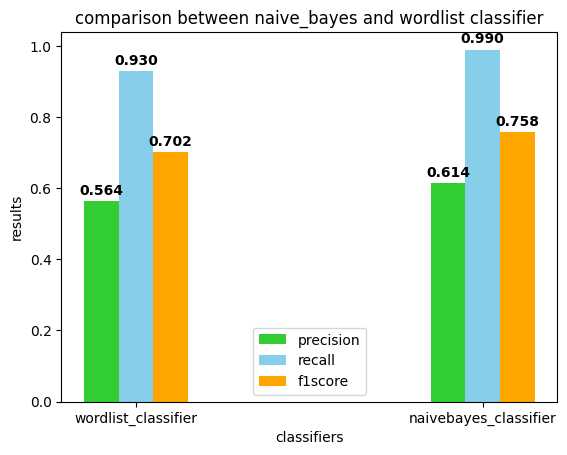

In [37]:
#creating bar graph to visualise a comparison between naive_bayes and wordlist classifier
import numpy as np
model_title=['wordlist_classifier','naivebayes_classifier']
precision_items=[p1,p2] #list of precision result of both classifier
recall_items=[r1,r2] #list of recall result of both classifier
f1score_items=[f1,f2] #list of f1score result of both classifier
bar_width=0.1
x=np.arange(len(model_title))
plt.bar(x-bar_width,precision_items,bar_width,label="precision",color='limegreen')
plt.bar(x,recall_items,bar_width,label="recall",color='skyblue')
plt.bar(x+bar_width,f1score_items,bar_width,label="f1score",color='orange')


[plt.text(i-bar_width,value+0.01,f'{value:.3f}',ha='center',va='bottom',color='black',fontweight='bold') for i,value in enumerate(precision_items)]
[plt.text(i,value+0.01,f'{value:.3f}',ha='center',va='bottom',color='black',fontweight='bold') for i,value in enumerate(recall_items)]
[plt.text(i+bar_width, value+0.01,f'{value:.3f}',ha='center',va='bottom',color='black',fontweight='bold') for i,value in enumerate(f1score_items)]
plt.xlabel('classifiers')
plt.ylabel('results')
plt.title("comparison between naive_bayes and wordlist classifier")
plt.xticks(x,model_title)
plt.legend()
plt.show()

**4B--Compare the performance**

 I created dictionary `d1` which stores the `precision`,`recall` and f1 score of both the classifier and also the difference between each of them. I used pandas dataframe to form a table which has the value for precision, recall and F1 score for wordlist classifier and naive bayes classifier and their result differences. When we compare the each result for both the classifier, we can see the naive bayes classifier has higher value which clearly indicates that naive bayes classifier is a better approach as compared to wordlist classifier. In the above table, if we check the value of precision , recall F1 score for both the classifier , naive bayes classifier performance is better as it has higher value. I also created a bar plot graph for better understanding.   
 For example, F1 score for wordlist is 0.70 which increases to 0.75 in naive bayes classifier. Recall value of wordlist classifier is 0.93 which is smaller than F1score 0.99 in naive bayes. So, Its look like naive bayes classifier is a better approach

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [38]:
#5a--carryout experiment
#randomly taking 50 instances for testing
accuracy=[]
precision=[]
recall=[]
f1_score=[]
for i in range(10,60):
  positive_review_list=[j[0] for j in posdiff.most_common(i)]

  negative_review_list=[j[0] for j in negdiff.most_common(i)]
  wc=wordlistClassifier(positive_review_list,negative_review_list)
  prediction1=wc.classify_many(docs)
  accuracy.append(classifier_evaluate(wc,testing_normalise_data))
  cm3=confusion_matrix(prediction1,gs)
  precision.append(cm3.precision())
  recall.append(cm3.recall())
  f1_score.append(cm3.F1())

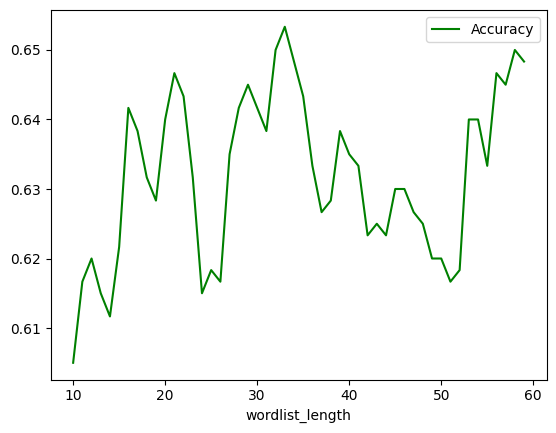

In [39]:
wordlist_length=list(range(10,60))
plt.plot(wordlist_length,accuracy,'g',label="Accuracy")
plt.xlabel('wordlist_length')
plt.legend()
plt.show()

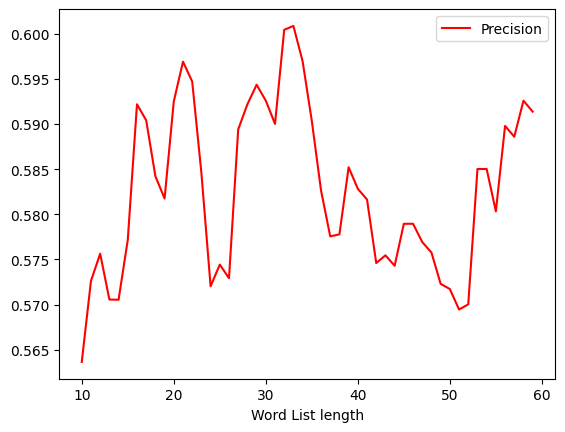

In [40]:
wordlist_length = list(range(10,60))
plt.plot(wordlist_length,precision ,'r',label = 'Precision')
plt.xlabel('Word List length')
plt.legend()
plt.show()

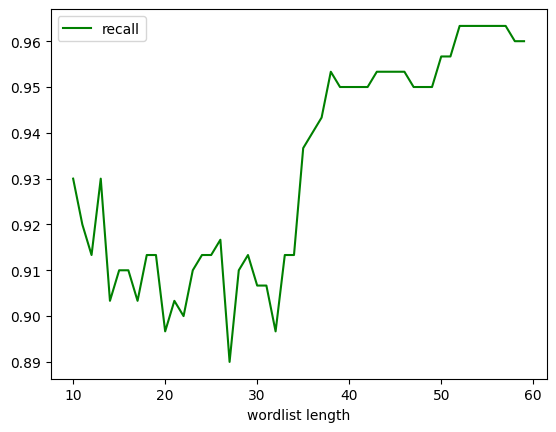

In [41]:
plt.plot(wordlist_length,recall,'g',label='recall')
plt.xlabel('wordlist length')
plt.legend()
plt.show()

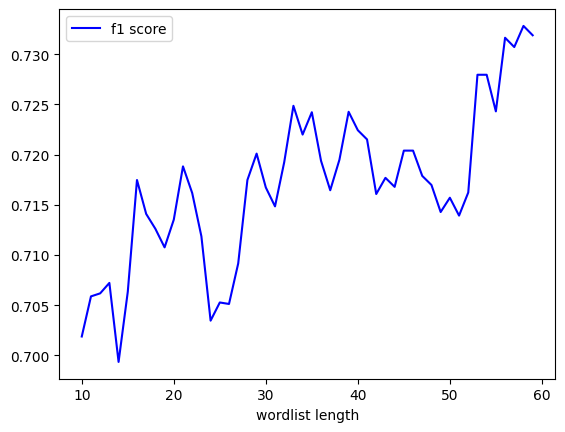

In [42]:
plt.plot(wordlist_length,f1_score,'b',label='f1 score')
plt.xlabel('wordlist length')
plt.legend()
plt.show()

**5a-Carryout experiment graph results**

To get the impact of length of wordlist for wordlist calssifier, we take 50 instance of positive and negative list. In loop, for each list , we calculate the accuracy-calling classifier_evaluate(), precision, recall and F1 score -calling confusion matrix.empty list are already created for accuracy, recallm precision and f1 score where this value will be appended using append() method.

We used matplotlib to plot the graphs for accuracy, precision, recall and F1 score.
- The accuracy decreases from 0.59 to 0.62 and again decreases at 0.615. It is increasing and decreasing at every point. At the end it increases to 0.65

- The precision decreases from 0.59 to 0.62 and again decreases at 0.615. It is increasing and decreasing at every point. At the end it increases to 0.65

- The recall startsfrom 0.93 and it increase till 0.95 and again increases to 0.96 and maintain a steady flow.
- The F1 score starts from 0.701 decreases t0 0.675. It maintain a increase-decrease curve till the highest point 0.735.


**5b-classifier recommendation**

- I will prefer and recommend `naive bayes classifier` over `wordlist` classifier in future work in this area.

- Wordlist classifier is easy to go model as it is using a predefined wordlist.But wordlist classifier is not **dynamic** and it is not using any **probabilistic apprach**.

- Naive bayes classifier follow probability as it can handle uncertainty also. wordlist classifier can't learn from new data because it is static. - naive bayes can handle new unseen large data.

- However, it depends on the condition of the application. If we have a predefined list and we want to have a simple model, then wordlist classifier may be a good approach.
- In sentiment analysis or text classification tasks in general, Naive Bayes classification is often a better choice. It can capture relationships between words and adapt to changing language structures.

In [43]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/ANLPassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Submission length is 1171
